# Data Analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-&amp;-Defaults" data-toc-modified-id="Imports-&amp;-Defaults-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports &amp; Defaults</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Additional-Cleaning" data-toc-modified-id="Additional-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Additional Cleaning</a></span><ul class="toc-item"><li><span><a href="#Filter-Duplicates-and-Records-missing-an-Abstract-&amp;-DOI" data-toc-modified-id="Filter-Duplicates-and-Records-missing-an-Abstract-&amp;-DOI-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Filter Duplicates and Records missing an Abstract &amp; DOI</a></span></li><li><span><a href="#Clean-Text-(first-pass)" data-toc-modified-id="Clean-Text-(first-pass)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Clean Text (first pass)</a></span></li><li><span><a href="#Normalise-Species-Names" data-toc-modified-id="Normalise-Species-Names-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Normalise Species Names</a></span></li><li><span><a href="#Clean-Text-(second-pass)" data-toc-modified-id="Clean-Text-(second-pass)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Clean Text (second pass)</a></span></li><li><span><a href="#Adding-SpaCy-and-NLTK-tokenised-text" data-toc-modified-id="Adding-SpaCy-and-NLTK-tokenised-text-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Adding SpaCy and NLTK tokenised text</a></span></li><li><span><a href="#Remove-Stopwords" data-toc-modified-id="Remove-Stopwords-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Remove Stopwords</a></span></li><li><span><a href="#Normalisation" data-toc-modified-id="Normalisation-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Normalisation</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Basic-Overview" data-toc-modified-id="Basic-Overview-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Basic Overview</a></span></li><li><span><a href="#Abstract-Length" data-toc-modified-id="Abstract-Length-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Abstract Length</a></span></li><li><span><a href="#Abstract-Sentiment-Score" data-toc-modified-id="Abstract-Sentiment-Score-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Abstract Sentiment Score</a></span></li><li><span><a href="#Sentiment-by-Method" data-toc-modified-id="Sentiment-by-Method-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Sentiment by Method</a></span></li><li><span><a href="#Sentiment-by-Method-and-Mention-of-'Chronic'" data-toc-modified-id="Sentiment-by-Method-and-Mention-of-'Chronic'-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Sentiment by Method and Mention of 'Chronic'</a></span></li></ul></li><li><span><a href="#Sandbox" data-toc-modified-id="Sandbox-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sandbox</a></span><ul class="toc-item"><li><span><a href="#Emotions" data-toc-modified-id="Emotions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Emotions</a></span></li><li><span><a href="#Plutchik-Wheel" data-toc-modified-id="Plutchik-Wheel-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plutchik Wheel</a></span></li></ul></li></ul></div>

## Imports & Defaults

In [1]:
#pip install pyplutchik
#pip install text2emotion
#pip install NRCLex

In [42]:
# Basics
import numpy as np 
import pandas as pd 

#String cleaning and processing
import re
import string

In [609]:
# Natural Language Processing

#Natural Language Toolkit
import nltk
from nltk.corpus import stopwords

# TextBlob
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
from textblob import Blobber
from textblob import TextBlob, Word

#Flair
from flair.models import TextClassifier
from flair.data import Sentence

#SpaCy
import spacy
import en_core_web_sm
#using small Spacy model
nlp = spacy.load('en_core_web_sm')
nlp_md = spacy.load('en_core_web_md')
from spacy.matcher import Matcher 

#Text2Emotion
import text2emotion as te

#NRCLex - for measuring emotion
from nrclex import NRCLex

In [17]:
# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

# import matplotlib.patches as mpatches
# import plotly.express as px

%matplotlib inline
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18

#Visualising Plutchik Model of Emotions
from pyplutchik import plutchik

In [5]:
#Unused

# import random


# from collections import Counter
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# from tqdm import tqdm
# import os
# import sys
# import xml.etree.ElementTree as et
# pd.options.mode.chained_assignment = None

## Load Data

In [6]:
LymeDisease = pd.read_csv('pubmedFiltered.csv', index_col=0)

In [7]:
LymeDisease

,publication,title,authors,doi,year,cites,type,abstract,article_url,fulltext_url,abstractLength,pubmed
0,Ticks and tick-borne diseases,The range of Ixodes ricinus and the risk of co...,"[{'name': 'Thomas G T Jaenson', 'affiliation':...",10.1016/j.ttbdis.2010.10.006,2011.0,0,Journal Article,"In Sweden, the geographical distribution of Ly...",NaN,NaN,1370.0,1
1,Ticks and tick-borne diseases,Low-density microarrays for the detection of B...,"[{'name': 'Julie A Houck', 'affiliation': 'Dep...",10.1016/j.ttbdis.2010.10.002,2011.0,0,Journal Article,Lyme disease is the most common tick-borne dis...,NaN,NaN,932.0,1
2,Ticks and tick-borne diseases,Infectivity of Borrelia burgdorferi sensu lato...,"[{'name': 'N D van Burgel', 'affiliation': 'De...",10.1016/j.ttbdis.2010.10.003,2011.0,0,Journal Article,"B. burgdorferi, B. afzelii, and B. bavariensis...",NaN,NaN,1428.0,1
4,Ticks and tick-borne diseases,Borrelia species in Ixodes affinis and Ixodes ...,"[{'name': 'Ricardo G Maggi', 'affiliation': 'I...",10.1016/j.ttbdis.2010.08.003,2010.0,0,Journal Article,Ixodes affinis and I. scapularis are tick spec...,NaN,NaN,1576.0,1
5,Ticks and tick-borne diseases,Are birds reservoir hosts for Borrelia afzelii?,"[{'name': 'Jan Franke', 'affiliation': 'Instit...",10.1016/j.ttbdis.2010.03.001,2010.0,0,Journal Article,It is known that birds are competent reservoir...,NaN,NaN,783.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4488,Trends in cardiovascular medicine,Chagas' cardiomyopathy and Lyme carditis: Less...,"[{'name': 'Cynthia Yeung', 'affiliation': ""Dep...",10.1016/j.tcm.2020.04.004,2021.0,0,Journal Article,Chagas' disease and Lyme disease are two endem...,NaN,NaN,913.0,1
4489,Journal of medical entomology,Barriers to Effective Tick Management and Tick...,"[{'name': 'Lars Eisen', 'affiliation': 'Divisi...",10.1093/jme/tjaa079,2021.0,0,Journal Article,Lyme and other tick-borne diseases are increas...,NaN,NaN,1750.0,1
4494,Medicina clinica,Erythema migrans.,"[{'name': 'Fernando García-Souto', 'affiliatio...",10.1016/j.medcli.2019.10.001,2021.0,0,Journal Article,NaN,NaN,NaN,NaN,1
4495,Acta clinica Belgica,Lyme disease in Western Europe: an emerging pr...,"[{'name': 'Olivia Vandekerckhove', 'affiliatio...",10.1080/17843286.2019.1694293,2021.0,0,Journal Article,Objectives: Lyme borreliosis is the most commo...,NaN,NaN,1684.0,1


In [8]:
LymeDisease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3300 entries, 0 to 4496
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publication     3300 non-null   object 
 1   title           3299 non-null   object 
 2   authors         3287 non-null   object 
 3   doi             3159 non-null   object 
 4   year            3297 non-null   float64
 5   cites           3300 non-null   int64  
 6   type            3300 non-null   object 
 7   abstract        3162 non-null   object 
 8   article_url     0 non-null      float64
 9   fulltext_url    0 non-null      float64
 10  abstractLength  3162 non-null   float64
 11  pubmed          3300 non-null   int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 335.2+ KB


In [19]:
text = LymeDisease.loc[1]['abstract']
text

'Lyme disease is the most common tick-borne disease in Europe and North America. In the hyperendemic Lyme disease regions of the eastern United States, nymphal Ixodes scapularis are the principal ticks transmitting the Lyme disease spirochete, Borrelia burgdorferi sensu stricto (s.s.). Approximately 25% of questing nymphs in endemic regions are infected with spirochetes. High throughput-sensitive and specific methods for testing nymphal I. scapularis for infection with B. burgdorferi are clearly needed. In the current study, we evaluated whether low-density microarrays could be adapted for the rapid and accurate detection and characterization of spirochetes in nymphal I. scapularis. Three different microarray platforms were developed and tested for the detection of spirochetes in ticks. They could both detect and differentiate different Borrelia genospecies, in one case detecting as few as a single copy of Borrelia DNA.'

## Additional Cleaning

### Filter Duplicates and Records missing an Abstract & DOI

In [9]:
LymeDisease = LymeDisease[(LymeDisease.abstract.notna() & LymeDisease.doi.notna() )]

In [10]:
LymeDisease.drop_duplicates(inplace=True)

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
LymeDisease.reset_index(inplace=True)

### Clean Text (first pass)

In [607]:
def clean_text(text):
#     text = str(text).lower() #make lower
#     text = re.sub('https?://\S+|www\.\S+', '', text) #remove links
    text = re.sub('<.*?>', '', text) #remove rmaining html tags
    text = re.sub('\u2009', ' ', text) #remove unicde charcter for thin space
#     text = re.sub("[^-9A-Za-z ]", '' , text) #remove double quotation and any punctuation
#     text = re.sub('\w*\d\w*', '', text) #remove numbers
    text = re.sub('-', ' ', text) #replace hyphen with space
    text = re.sub(' +', ' ', text) #remove extra whitespace
    
    #
    text = re.sub('spp.', 'spp', text)
    text = re.sub('sp.', 'sp', text)
    text = re.sub('cf.', 'cf', text)
    text = re.sub('aff.', 'aff', text)
    text = re.sub('var.', 'var', text)
    return text

In [608]:
LymeDisease['clean_text'] = LymeDisease['abstract'].apply(clean_text)

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Normalise Species Names

Species names can appear in an inconsistent formats. *Genus species, G. species, G. species sub species, G. species s. s.* etc so normalising them may give a better picture of common words and n-grams. The function below finds the abbreviated forms of species names (normally a second mention) and then matches with a preceeding full name earlier in the text and then converts both the abbreviated and full mention to camel case GenusSpecies. It so far does not cath all of them but has picked up over 100 variations and can be further refined.

In [594]:
def normaliseSpeciesNames(text):

    speciesShortName =''
    speciesShortNamesList = []
    speciesShortNameTokens = []
    speciesShortNameTokensList = []
    speciesFullNameList = []
    camelCaseList = []
    replaceDict = {}
    
    doc = nlp(text) #tokenise with SpaCy
    
    for token in doc[:-1]:
        if token.shape_ == 'X.':
            speciesShortName = speciesShortName + str(token)
            speciesShortNameTokens.append(token)
            j=1        
            while (doc[token.i+j].shape_ == 'x.' or
                   (doc[token.i+j].is_alpha and 
                    doc[token.i+j].is_stop==False and #not a stopword
                    doc[token.i+j].is_oov and #not in SpaCy vocab
                    doc[token.i+j].lemma_ == doc[token.i+j].text and #is already in lemmatised form
                    doc[token.i+j].text not in nltk.corpus.words.words())): #not in NLTK vocab
                speciesShortName += ' ' + str(doc[token.i+j])
                speciesShortNameTokens.append(doc[token.i+j])
                j+=1
                if token.i+j >= len(doc): 
                    break
#                 print(speciesShortName)
            if (len(speciesShortNameTokens)>1 and speciesShortName not in speciesShortNamesList):
                speciesShortNamesList.append(speciesShortName)
                speciesShortNameTokensList.append(speciesShortNameTokens)
                
                #SpaCy process for pattern matching
                matcher = Matcher(nlp.vocab)
                letter = "^" + speciesShortNameTokens[0].text[0]
                pattern = [{"SHAPE": "Xxxxx", "TEXT": {"REGEX": letter}}] #find capitalised word beginning with correct letter
                for tkn in speciesShortNameTokens[1:]:
                    if tkn.shape_ =='x.':
                        letter = "^" + tkn.text[0]
                        pattern.append({"SHAPE": "xxxx", "TEXT": {"REGEX": letter}}) #find non-capitalised word beginning with correct letter
                    else:
                        pattern.append({"TEXT": tkn.text})
                matcher.add("Species_Pattern", [pattern])
                matches = matcher(doc)
                if len(matches)>0:
                    start = matches[0][1]
                    end =  matches[0][2]
                    matched_span = doc[start:end]
                    speciesFullNameList.append(matched_span.text)
            speciesShortName=''
            speciesShortNameTokens=[]

    for name in speciesFullNameList:
        camel = ''.join(word.capitalize() for word in name.split(' '))
        camelCaseList.append(camel)
    
    for short, long, camel in zip(speciesShortNamesList, speciesFullNameList, camelCaseList):
        replaceDict[short] = camel
        replaceDict[long] = camel
        namesDict[long]=camel
        
#     for short, long in zip(speciesShortNamesList, speciesFullNameList):
#         print(short,long)
          
    #sort dictionary of words to replace by length so longest names are changed first
    sortedKeyList = sorted(replaceDict.keys(), key=lambda s: len(replaceDict.get(s)), reverse = True)

    for index in range(len(sortedKeyList)):
        text = re.sub(sortedKeyList[index], replaceDict[sortedKeyList[index]], text)
    
    return text

In [595]:
#global variable to collect names 
namesDict = {}

In [612]:
LymeDisease['clean_abstract'] = LymeDisease['clean_text'].apply(normaliseSpeciesNames)

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [631]:
LymeDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           2720 non-null   int64  
 1   publication     2720 non-null   object 
 2   title           2720 non-null   object 
 3   authors         2717 non-null   object 
 4   doi             2720 non-null   object 
 5   year            2720 non-null   float64
 6   cites           2720 non-null   int64  
 7   type            2720 non-null   object 
 8   abstract        2720 non-null   object 
 9   article_url     0 non-null      float64
 10  fulltext_url    0 non-null      float64
 11  abstractLength  2720 non-null   float64
 12  pubmed          2720 non-null   int64  
 13  clean_text      2720 non-null   object 
 14  clean_abstract  2720 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 318.9+ KB


In [614]:
len(namesDict)

185

In [615]:
namesDict

{'Ixodes scapularis': 'IxodesScapularis',
 'Borrelia burgdorferi': 'BorreliaBurgdorferi',
 'Ixodes affinis': 'IxodesAffinis',
 'Borrelia burgdorferi sensu stricto': 'BorreliaBurgdorferiSensuStricto',
 'Borrelia afzelii': 'BorreliaAfzelii',
 'Borrelia persica': 'BorreliaPersica',
 'Ornithodoros tholozani': 'OrnithodorosTholozani',
 'Borrelia burgdorferi sensu lato': 'BorreliaBurgdorferiSensuLato',
 'Ixodes pacificus': 'IxodesPacificus',
 'Peromyscus maniculatus': 'PeromyscusManiculatus',
 'Ixodes hexagonus': 'IxodesHexagonus',
 'Dermacentor reticulatus': 'DermacentorReticulatus',
 'Borrelia garinii': 'BorreliaGarinii',
 'Anaplasma phagocytophilum': 'AnaplasmaPhagocytophilum',
 'Francisella tularensis': 'FrancisellaTularensis',
 'Ixodes auritulus': 'IxodesAuritulus',
 'Orientia tsutsugamushi': 'OrientiaTsutsugamushi',
 'Coxiella burnetii': 'CoxiellaBurnetii',
 'Borrelia lusitaniae': 'BorreliaLusitaniae',
 'Borrelia hermsii': 'BorreliaHermsii',
 'Sciurus griseus': 'SciurusGriseus',
 'Borr

### Clean Text (second pass)

In [698]:
def clean_text2(text):
#     text = str(text).lower() #make lower
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove links
    text = re.sub("[^-9A-Za-z ]", '' , text) #remove double quotation and any punctuation
    text = re.sub('\w*\d\w*', '', text) #remove numbers


    return text

In [699]:
LymeDisease['cleaner_abstract'] = LymeDisease['clean_abstract'].apply(clean_text2)

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Adding SpaCy and NLTK tokenised text

In [700]:
from nltk.tokenize import RegexpTokenizer

#w means tokens are made of only alphanumeric characters where + indicates that they comprise of one or more of such characters
tokenizer = RegexpTokenizer('\w+')

In [713]:
LymeDisease['tokenisedAbstractSpacy'] = LymeDisease['cleaner_abstract'].apply(nlp)
LymeDisease['tokenisedAbstractNLTK'] = LymeDisease['cleaner_abstract'].apply(tokenizer.tokenize)

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [715]:
LymeDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   2720 non-null   int64  
 1   publication             2720 non-null   object 
 2   title                   2720 non-null   object 
 3   authors                 2717 non-null   object 
 4   doi                     2720 non-null   object 
 5   year                    2720 non-null   float64
 6   cites                   2720 non-null   int64  
 7   type                    2720 non-null   object 
 8   abstract                2720 non-null   object 
 9   article_url             0 non-null      float64
 10  fulltext_url            0 non-null      float64
 11  abstractLength          2720 non-null   float64
 12  pubmed                  2720 non-null   int64  
 13  clean_text              2720 non-null   object 
 14  clean_abstract          2720 non-null   

In [716]:
LymeDisease.head()

,index,publication,title,authors,doi,year,cites,type,abstract,article_url,fulltext_url,abstractLength,pubmed,clean_text,clean_abstract,cleaner_abstract,tokenisedAbstractSpacy,tokenisedAbstractNLTK
0,0,Ticks and tick-borne diseases,The range of Ixodes ricinus and the risk of co...,"[{'name': 'Thomas G T Jaenson', 'affiliation':...",10.1016/j.ttbdis.2010.10.006,2011.0,0,Journal Article,"In Sweden, the geographical distribution of Ly...",NaN,NaN,1370.0,1,"In Sweden, the geographical distribution of Ly...","In Sweden, the geographical distribution of Ly...",In Sweden the geographical distribution of Lym...,"(In, Sweden, the, geographical, distribution, ...","[In, Sweden, the, geographical, distribution, ..."
1,1,Ticks and tick-borne diseases,Low-density microarrays for the detection of B...,"[{'name': 'Julie A Houck', 'affiliation': 'Dep...",10.1016/j.ttbdis.2010.10.002,2011.0,0,Journal Article,Lyme disease is the most common tick-borne dis...,NaN,NaN,932.0,1,Lyme disease is the most common tick borne dis...,Lyme disease is the most common tick borne dis...,Lyme disease is the most common tick borne dis...,"(Lyme, disease, is, the, most, common, tick, b...","[Lyme, disease, is, the, most, common, tick, b..."
2,2,Ticks and tick-borne diseases,Infectivity of Borrelia burgdorferi sensu lato...,"[{'name': 'N D van Burgel', 'affiliation': 'De...",10.1016/j.ttbdis.2010.10.003,2011.0,0,Journal Article,"B. burgdorferi, B. afzelii, and B. bavariensis...",NaN,NaN,1428.0,1,"B. burgdorferi, B. afzelii, and B. bavarensis ...","B. burgdorferi, B. afzelii, and B. bavarensis ...",B burgdorferi B afzelii and B bavarensis show ...,"(B, burgdorferi, B, afzelii, and, B, bavarensi...","[B, burgdorferi, B, afzelii, and, B, bavarensi..."
3,4,Ticks and tick-borne diseases,Borrelia species in Ixodes affinis and Ixodes ...,"[{'name': 'Ricardo G Maggi', 'affiliation': 'I...",10.1016/j.ttbdis.2010.08.003,2010.0,0,Journal Article,Ixodes affinis and I. scapularis are tick spec...,NaN,NaN,1576.0,1,Ixodes affnis and I. scapularis are tick spcie...,IxodesAffnis and IxodesAffnis are tick spcies ...,IxodesAffnis and IxodesAffnis are tick spcies ...,"(IxodesAffnis, and, IxodesAffnis, are, tick, s...","[IxodesAffnis, and, IxodesAffnis, are, tick, s..."
4,5,Ticks and tick-borne diseases,Are birds reservoir hosts for Borrelia afzelii?,"[{'name': 'Jan Franke', 'affiliation': 'Instit...",10.1016/j.ttbdis.2010.03.001,2010.0,0,Journal Article,It is known that birds are competent reservoir...,NaN,NaN,783.0,1,It is known that birds are competent reservoir...,It is known that birds are competent reservoir...,It is known that birds are competent reservoir...,"(It, is, known, that, birds, are, competent, r...","[It, is, known, that, birds, are, competent, r..."


### Remove Stopwords

In [690]:
from nltk.corpus import stopwords
stoplist = set(stopwords.words("english"))

In [721]:
def removeStopwordsSpaCy(spacy_doc):
    text = " ".join([token.text for token in spacy_doc if token.is_stop == False and token.is_alpha])
    return text

In [722]:
def removeStopwordsNLTK(nltk_tokens):
    text = " ".join(nltk.Text([word for word in nltk_tokens if word.lower() not in stoplist]))
    return text

In [723]:
LymeDisease['abstractNoStopSpacy'] = LymeDisease['tokenisedAbstractSpacy'].apply(removeStopwordsSpaCy)
LymeDisease['abstractNoStopNLTK'] = LymeDisease['tokenisedAbstractNLTK'].apply(removeStopwordsNLTK)

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [724]:
LymeDisease.loc[2000].abstractNoStopSpacy

'Ticks Acari Ixodida vectors andor reservoirs pathogens ie BorreliaBurgdorferiSensuLato AnaplasmaPhagocytophilum BabesiaMicroti pathogens ethiological agents diseases Lyme borreliosis human granulocytic anaplasmosis human babesiosis aim study evaluate role Ixodes ricinus transmission BorreliaBurgdorferiSensuLato BorreliaAfzelii Borrelia garinii BorreliaBurgdorferiSensuStricto AnaplasmaPhagocytophilum BabesiaMicroti Opolskie Province Poland DNA ticks isolated ammonia method pair primers spcific flagelline gene detect BorreliaBurgdorferiSensuLato detect genospcies sprochete pairs internal primers turn pairs primers spcific S rDNA gene S rRNA respctively detection AnaplasmaPhagocytophilum BabesiaMicroti Borrelia burgdorferi s l AnaplasmaPhagocytophilum BabesiaMicroti detected examined ticks respctively ticks infected BorreliaBurgdorferiSensuLato BorreliaAfzelii found seven undefinied genospcies mixed infection BorreliaAfzelii BorreliaBurgdorferiSensuStricto study demonstrated potential ri

In [725]:
LymeDisease.loc[2000].abstractNoStopNLTK

'Ticks Acari Ixodida vectors andor reservoirs many pathogens ie BorreliaBurgdorferiSensuLato AnaplasmaPhagocytophilum BabesiaMicroti pathogens ethiological agents diseases Lyme borreliosis human granulocytic anaplasmosis human babesiosis aim study evaluate role Ixodes ricinus transmission BorreliaBurgdorferiSensuLato BorreliaAfzelii Borrelia garinii BorreliaBurgdorferiSensuStricto AnaplasmaPhagocytophilum BabesiaMicroti Opolskie Province Poland DNA ticks isolated ammonia method pair primers spcific flagelline gene used detect BorreliaBurgdorferiSensuLato detect genospcies sprochete three pairs internal primers used turn two pairs primers spcific rDNA gene rRNA used respctively detection AnaplasmaPhagocytophilum BabesiaMicroti Borrelia burgdorferi l AnaplasmaPhagocytophilum BabesiaMicroti detected examined ticks respctively ten ticks infected BorreliaBurgdorferiSensuLato BorreliaAfzelii found seven undefinied genospcies two mixed infection BorreliaAfzelii BorreliaBurgdorferiSensuStricto

### Normalisation

In [728]:
lemmatizer = nltk.WordNetLemmatizer()

In [731]:
def lemmatiseSpaCy(spacy_doc):
    text = " ".join([token.lemma_ for token in spacy_doc])
    return text

In [732]:
def lemmatiseNLTK(nltk_tokens):
    text = " ".join([lemmatizer.lemmatize(token) for token in nltk_tokens])
    return text

In [735]:
def removeStopwordsLemmatiseSpaCy(spacy_doc):
    text = " ".join([token.lemma_ for token in spacy_doc if token.is_stop == False and token.is_alpha])
    return text

In [736]:
def removeStopwordsNLTK(nltk_tokens):
    text = " ".join([lemmatizer.lemmatize(token) for token in nltk_tokens if token.lower() not in stoplist])
    return text

In [738]:
LymeDisease['abstractLemmaSpacy'] = LymeDisease['tokenisedAbstractSpacy'].apply(lemmatiseSpaCy)
LymeDisease['abstractLemmaNLTK'] = LymeDisease['tokenisedAbstractNLTK'].apply(lemmatiseNLTK)

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [739]:
LymeDisease['abstractLemmaNoStopSpacy'] = LymeDisease['tokenisedAbstractSpacy'].apply(removeStopwordsLemmatiseSpaCy)
LymeDisease['abstractLemmaNoStopNLTK'] = LymeDisease['tokenisedAbstractNLTK'].apply(removeStopwordsNLTK)

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [740]:
LymeDisease.loc[2000].abstractLemmaSpacy

'Ticks Acari Ixodida be vector andor reservoir of many pathogen ie BorreliaBurgdorferiSensuLato AnaplasmaPhagocytophilum and BabesiaMicroti these pathogen be ethiological agent of such disease as Lyme borreliosis human granulocytic anaplasmosis and human babesiosis the aim of the study be to evaluate the role of the Ixodes ricinus in the transmission of BorreliaBurgdorferiSensuLato BorreliaAfzelii Borrelia garinii BorreliaBurgdorferiSensuStricto AnaplasmaPhagocytophilum and BabesiaMicroti in Opolskie Province in Poland DNA from   tick be isolate by the ammonia method the pair of primer spcific to the flagelline gene be use to detect of BorreliaBurgdorferiSensuLato to detect of genospcie of this sprochete three pair of internal primer be use in turn two pair of primer spcific to the S rDNA gene and the S rRNA be use respctively for the detection of AnaplasmaPhagocytophilum and BabesiaMicroti Borrelia burgdorferi s l AnaplasmaPhagocytophilum and BabesiaMicroti be detect in    and   of ex

In [741]:
LymeDisease.loc[2000].abstractLemmaNLTK

'Ticks Acari Ixodida are vector andor reservoir of many pathogen ie BorreliaBurgdorferiSensuLato AnaplasmaPhagocytophilum and BabesiaMicroti These pathogen are ethiological agent of such disease a Lyme borreliosis human granulocytic anaplasmosis and human babesiosis The aim of the study wa to evaluate the role of the Ixodes ricinus in the transmission of BorreliaBurgdorferiSensuLato BorreliaAfzelii Borrelia garinii BorreliaBurgdorferiSensuStricto AnaplasmaPhagocytophilum and BabesiaMicroti in Opolskie Province in Poland DNA from tick wa isolated by the ammonia method The pair of primer spcific to the flagelline gene wa used to detect of BorreliaBurgdorferiSensuLato To detect of genospcies of this sprochete three pair of internal primer were used In turn two pair of primer spcific to the S rDNA gene and the S rRNA were used respctively for the detection of AnaplasmaPhagocytophilum and BabesiaMicroti Borrelia burgdorferi s l AnaplasmaPhagocytophilum and BabesiaMicroti were detected in an

In [742]:
LymeDisease.loc[2000].abstractLemmaNoStopSpacy

'Ticks Acari Ixodida vector andor reservoir pathogen ie BorreliaBurgdorferiSensuLato AnaplasmaPhagocytophilum BabesiaMicroti pathogen ethiological agent disease Lyme borreliosis human granulocytic anaplasmosis human babesiosis aim study evaluate role Ixodes ricinus transmission BorreliaBurgdorferiSensuLato BorreliaAfzelii Borrelia garinii BorreliaBurgdorferiSensuStricto AnaplasmaPhagocytophilum BabesiaMicroti Opolskie Province Poland DNA tick isolate ammonia method pair primer spcific flagelline gene detect BorreliaBurgdorferiSensuLato detect genospcie sprochete pair internal primer turn pair primer spcific S rDNA gene S rRNA respctively detection AnaplasmaPhagocytophilum BabesiaMicroti Borrelia burgdorferi s l AnaplasmaPhagocytophilum BabesiaMicroti detect examine tick respctively tick infect BorreliaBurgdorferiSensuLato BorreliaAfzelii find seven undefinied genospcie mixed infection BorreliaAfzelii BorreliaBurgdorferiSensuStricto study demonstrate potential risk exposure human animal

In [743]:
LymeDisease.loc[2000].abstractLemmaNoStopNLTK

'Ticks Acari Ixodida vector andor reservoir many pathogen ie BorreliaBurgdorferiSensuLato AnaplasmaPhagocytophilum BabesiaMicroti pathogen ethiological agent disease Lyme borreliosis human granulocytic anaplasmosis human babesiosis aim study evaluate role Ixodes ricinus transmission BorreliaBurgdorferiSensuLato BorreliaAfzelii Borrelia garinii BorreliaBurgdorferiSensuStricto AnaplasmaPhagocytophilum BabesiaMicroti Opolskie Province Poland DNA tick isolated ammonia method pair primer spcific flagelline gene used detect BorreliaBurgdorferiSensuLato detect genospcies sprochete three pair internal primer used turn two pair primer spcific rDNA gene rRNA used respctively detection AnaplasmaPhagocytophilum BabesiaMicroti Borrelia burgdorferi l AnaplasmaPhagocytophilum BabesiaMicroti detected examined tick respctively ten tick infected BorreliaBurgdorferiSensuLato BorreliaAfzelii found seven undefinied genospcies two mixed infection BorreliaAfzelii BorreliaBurgdorferiSensuStricto one study dem

In [678]:
" ".join([token.lemma_ for token in tokenisedTextSpacy])

'Ticks Acari Ixodida be vector andor reservoir of many pathogen ie BorreliaBurgdorferiSensuLato AnaplasmaPhagocytophilum and BabesiaMicroti these pathogen be ethiological agent of such disease as Lyme borreliosis human granulocytic anaplasmosis and human babesiosis the aim of the study be to evaluate the role of the Ixodes ricinus in the transmission of BorreliaBurgdorferiSensuLato BorreliaAfzelii Borrelia garinii BorreliaBurgdorferiSensuStricto AnaplasmaPhagocytophilum and BabesiaMicroti in Opolskie Province in Poland DNA from   tick be isolate by the ammonia method the pair of primer spcific to the flagelline gene be use to detect of BorreliaBurgdorferiSensuLato to detect of genospcie of this sprochete three pair of internal primer be use in turn two pair of primer spcific to the S rDNA gene and the S rRNA be use respctively for the detection of AnaplasmaPhagocytophilum and BabesiaMicroti Borrelia burgdorferi s l AnaplasmaPhagocytophilum and BabesiaMicroti be detect in    and   of ex

In [734]:
" ".join([lemmatizer.lemmatize(t) for t in tokenisedTextNLTK if t.lower() not in stoplist])

'Ticks Acari Ixodida vector andor reservoir many pathogen ie BorreliaBurgdorferiSensuLato AnaplasmaPhagocytophilum BabesiaMicroti pathogen ethiological agent disease Lyme borreliosis human granulocytic anaplasmosis human babesiosis aim study evaluate role Ixodes ricinus transmission BorreliaBurgdorferiSensuLato BorreliaAfzelii Borrelia garinii BorreliaBurgdorferiSensuStricto AnaplasmaPhagocytophilum BabesiaMicroti Opolskie Province Poland DNA tick isolated ammonia method pair primer spcific flagelline gene used detect BorreliaBurgdorferiSensuLato detect genospcies sprochete three pair internal primer used turn two pair primer spcific rDNA gene rRNA used respctively detection AnaplasmaPhagocytophilum BabesiaMicroti Borrelia burgdorferi l AnaplasmaPhagocytophilum BabesiaMicroti detected examined tick respctively ten tick infected BorreliaBurgdorferiSensuLato BorreliaAfzelii found seven undefinied genospcies two mixed infection BorreliaAfzelii BorreliaBurgdorferiSensuStricto one study dem

## EDA

### Basic Overview

In [744]:
LymeDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     2720 non-null   int64  
 1   publication               2720 non-null   object 
 2   title                     2720 non-null   object 
 3   authors                   2717 non-null   object 
 4   doi                       2720 non-null   object 
 5   year                      2720 non-null   float64
 6   cites                     2720 non-null   int64  
 7   type                      2720 non-null   object 
 8   abstract                  2720 non-null   object 
 9   article_url               0 non-null      float64
 10  fulltext_url              0 non-null      float64
 11  abstractLength            2720 non-null   float64
 12  pubmed                    2720 non-null   int64  
 13  clean_text                2720 non-null   object 
 14  clean_ab

In [745]:
LymeDisease.describe()

,index,year,cites,article_url,fulltext_url,abstractLength,pubmed
count,2720.000000,2720.000000,2720.0,0.0,0.0,2720.000000,2720.0
mean,2307.337132,2016.055147,0.0,NaN,NaN,1477.532353,1.0
std,1300.447544,3.327957,0.0,NaN,NaN,498.685677,0.0
min,0.000000,2010.000000,0.0,NaN,NaN,131.000000,1.0
25%,1197.750000,2014.000000,0.0,NaN,NaN,1154.000000,1.0
50%,2330.500000,2016.000000,0.0,NaN,NaN,1479.000000,1.0
75%,3479.250000,2019.000000,0.0,NaN,NaN,1768.500000,1.0
max,4496.000000,2021.000000,0.0,NaN,NaN,3980.000000,1.0


In [746]:
LymeDisease[LymeDisease.abstractLength==131]

,index,publication,title,authors,doi,year,cites,type,abstract,article_url,...,clean_abstract,cleaner_abstract,tokenisedAbstractSpacy,tokenisedAbstractNLTK,abstractNoStopSpacy,abstractNoStopNLTK,abstractLemmaSpacy,abstractLemmaNLTK,abstractLemmaNoStopSpacy,abstractLemmaNoStopNLTK
982,1729,Workplace health & safety,Lyme Disease.,"[{'name': 'Susan A Randolph', 'affiliation': '...",10.1177/2165079915616398,2016.0,0,Journal Article,Occupational and environmental health nurses s...,NaN,...,Occupational and environmental health nurses s...,Occupational and environmental health nurses s...,"(Occupational, and, environmental, health, nur...","[Occupational, and, environmental, health, nur...",Occupational environmental health nurses educa...,Occupational environmental health nurses educa...,occupational and environmental health nurse sh...,Ticks Acari Ixodida are vector andor reservoir...,occupational environmental health nurse educat...,Occupational environmental health nurse educat...


In [747]:
list(LymeDisease[LymeDisease.abstractLength==131].abstract)

['Occupational and environmental health nurses should educate workers about ways to prevent tick bites, which can cause Lyme disease.']

### Abstract Length

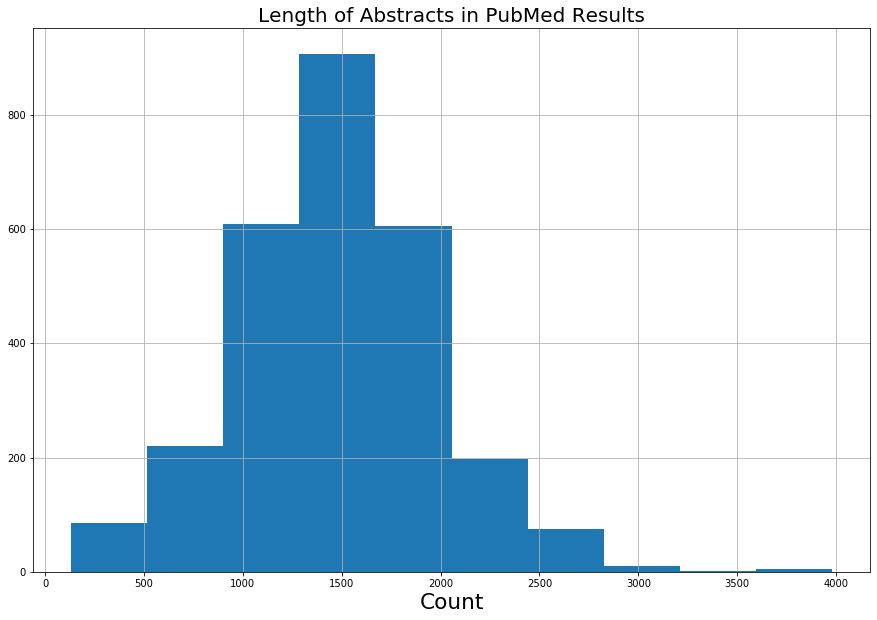

In [748]:
LymeDisease.abstractLength.hist()
plt.xlabel('Abstract Length')
plt.xlabel('Count')
plt.title('Length of Abstracts in PubMed Results');

In [749]:
len(LymeDisease[LymeDisease.abstract.str.contains('© | (C)')])

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


1407

In [750]:
LymeDisease[LymeDisease.abstract.str.contains('©')]

,index,publication,title,authors,doi,year,cites,type,abstract,article_url,...,clean_abstract,cleaner_abstract,tokenisedAbstractSpacy,tokenisedAbstractNLTK,abstractNoStopSpacy,abstractNoStopNLTK,abstractLemmaSpacy,abstractLemmaNLTK,abstractLemmaNoStopSpacy,abstractLemmaNoStopNLTK
1368,2342,Radiographics,White Matter Diseases with Radiologic-Patholog...,"[{'name': 'Nicolae Sarbu', 'affiliation': 'Fro...",10.1148/rg.2016160031,2016.0,0,Journal Article,White matter diseases include a wide spectrum ...,NaN,...,White matter diseases include a wide spctrum o...,White matter diseases include a wide spctrum o...,"(White, matter, diseases, include, a, wide, sp...","[White, matter, diseases, include, a, wide, sp...",White matter diseases include wide spctrum dis...,White matter diseases include wide spctrum dis...,white matter disease include a wide spctrum of...,Ticks Acari Ixodida are vector andor reservoir...,white matter disease include wide spctrum diso...,White matter disease include wide spctrum diso...
2071,3527,Radiographics,Neuroimaging of Emergent and Reemergent Infect...,"[{'name': 'Rafael Lourenço do Carmo', 'affilia...",10.1148/rg.2019190020,2019.0,0,Journal Article,Infectious diseases emerge and reemerge over t...,NaN,...,Infectious diseases emerge and reemerge over t...,Infectious diseases emerge and reemerge over t...,"(Infectious, diseases, emerge, and, reemerge, ...","[Infectious, diseases, emerge, and, reemerge, ...",Infectious diseases emerge reemerge years caus...,Infectious diseases emerge reemerge years many...,infectious disease emerge and reemerge over th...,Ticks Acari Ixodida are vector andor reservoir...,infectious disease emerge reemerge year cause ...,Infectious disease emerge reemerge year many c...
2652,4350,Current protocols,Transformation of Borrelia burgdorferi.,"[{'name': 'J Seshu', 'affiliation': 'Departmen...",10.1002/cpz1.61,2021.0,0,Journal Article,Transformation techniques used to genetically ...,NaN,...,Transformation techniques used to genetically ...,Transformation techniques used to genetically ...,"(Transformation, techniques, used, to, genetic...","[Transformation, techniques, used, to, genetic...",Transformation techniques genetically manipula...,Transformation techniques used genetically man...,transformation technique use to genetically ma...,Ticks Acari Ixodida are vector andor reservoir...,transformation technique genetically manipulat...,Transformation technique used genetically mani...


In [51]:
flairClassifier = TextClassifier.load('en-sentiment')

2021-09-17 20:23:58,550 loading file /Users/myfriendscallmej/.flair/models/sentiment-en-mix-distillbert_4.pt


In [57]:
def flair_prediction(x):
    sentence = Sentence(x)
    flairClassifier.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"

In [19]:
tba = Blobber(analyzer=NaiveBayesAnalyzer())

In [20]:
LymeDisease['abstractSentimentScore_TB'] = LymeDisease['abstract'].apply(lambda text: TextBlob(text).sentiment[0])
LymeDisease['abstractSentiment_TB'] = np.select([LymeDisease["abstractSentimentScore_TB"] < 0, LymeDisease["abstractSentimentScore_TB"] == 0, LymeDisease["abstractSentimentScore_TB"] > 0],
                           ['neg', 'neu', 'pos'])
LymeDisease['abstractSentiment_TB_NB'] = LymeDisease['abstract'].apply(lambda text: tba(text).sentiment[0])

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A valu

In [109]:
LymeDisease['abstractSentiment_Flair'] = LymeDisease['abstract'].apply(flair_prediction)       

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Abstract Sentiment Score

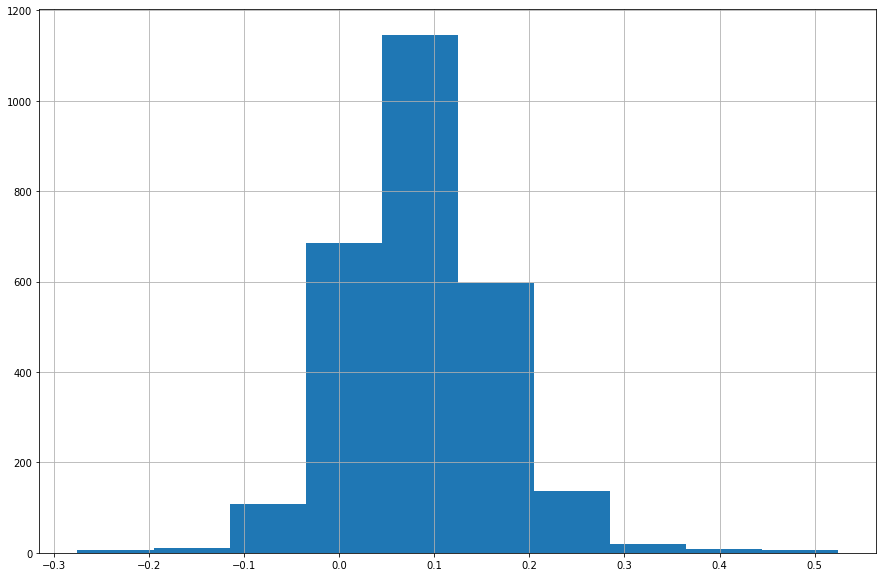

In [112]:
LymeDisease.abstractSentimentScore_TB.hist()

In [129]:
flairCounts = LymeDisease.abstractSentiment_Flair.value_counts()
TBcounts = LymeDisease.abstractSentiment_TB.value_counts()
TBNBcounts = LymeDisease.abstractSentiment_TB_NB.value_counts()

In [136]:
flairCountsDF = pd.DataFrame(flairCounts)
TBcountsDF = pd.DataFrame(TBcounts)
TBNBcountsDF = pd.DataFrame(TBNBcounts)

In [151]:
sentimentValueCounts = TBcountsDF.merge(TBNBcountsDF, how='left', left_index=True, right_index=True).merge(flairCountsDF, how='left', left_index=True, right_index=True)
sentimentValueCounts.fillna(0, inplace=True)
sentimentValueCounts.columns = ['TextBlobber', 'TextBlobber - Naive Bayes', 'Flair']
sentimentValueCounts

,TextBlobber,TextBlobber - Naive Bayes,Flair
pos,2382,2671.0,792.0
neg,315,49.0,1928.0
neu,23,0.0,0.0


In [154]:
sentimentValueCounts.sum()

TextBlobber                  2720.0
TextBlobber - Naive Bayes    2720.0
Flair                        2720.0
dtype: float64

### Sentiment by Method

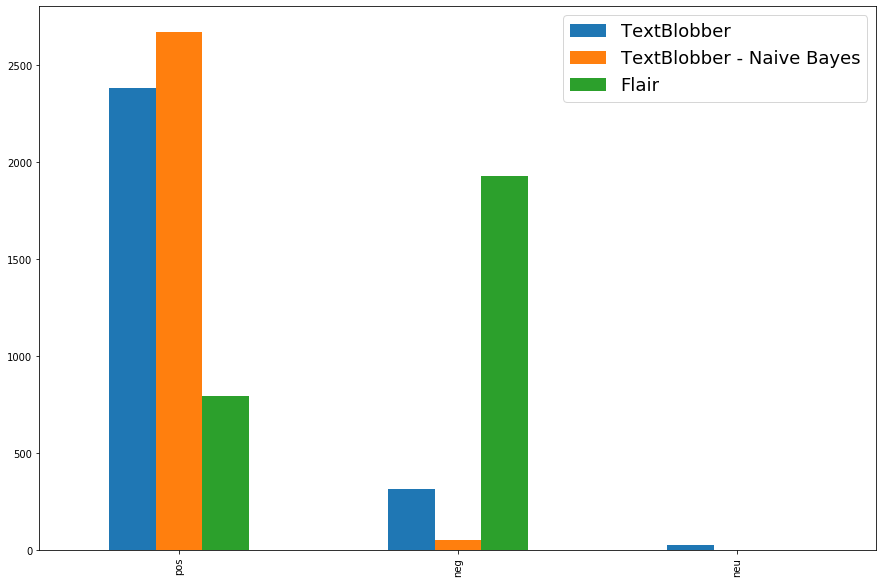

In [152]:
sentimentValueCounts.plot(kind='bar')

In [159]:
LymeDisease['containsChronic'] = LymeDisease.abstract.str.contains('chronic')

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [161]:
LymeDisease.containsChronic.value_counts()

False    2515
True      205
Name: containsChronic, dtype: int64

In [171]:
from  matplotlib.ticker import PercentFormatter

### Sentiment by Method and Mention of 'Chronic'

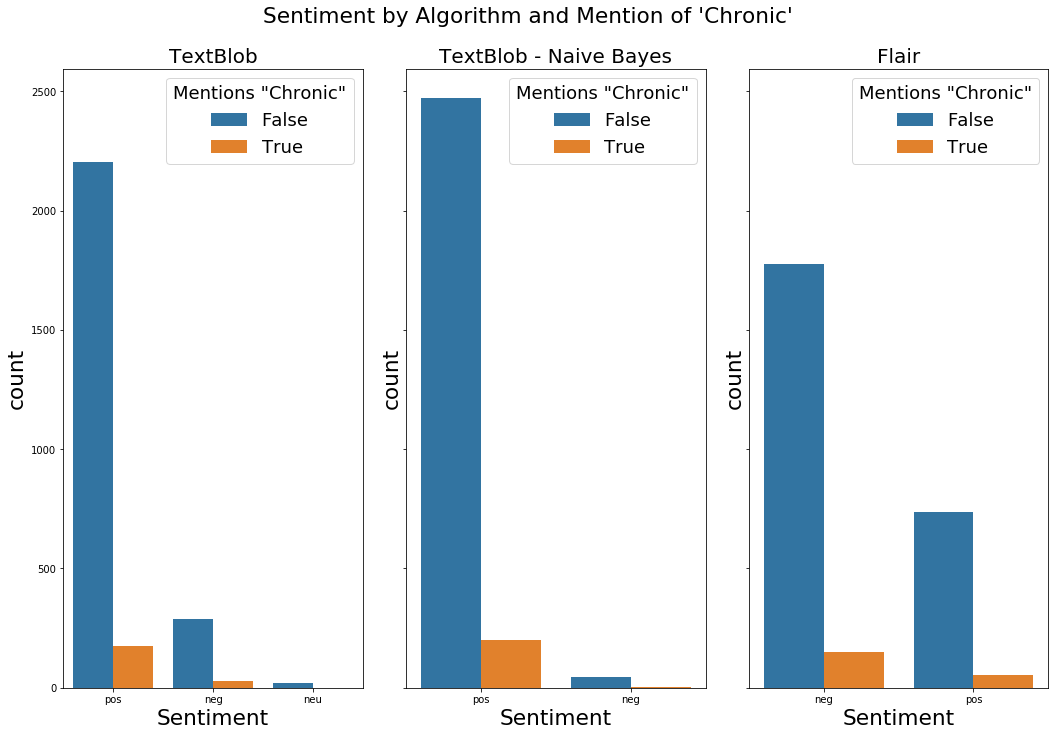

In [259]:
fig, axes =plt.subplots(1,3, sharey=True)
sns.countplot(x="abstractSentiment_TB", hue="containsChronic", 
            data=LymeDisease, ax=axes[0])
sns.countplot(x="abstractSentiment_TB_NB", hue="containsChronic", 
            data=LymeDisease, ax=axes[1])
sns.countplot(x="abstractSentiment_Flair", hue="containsChronic", 
            data=LymeDisease, ax=axes[2])
axes[0].set_title('TextBlob')
axes[1].set_title('TextBlob - Naive Bayes')
axes[2].set_title('Flair')
axes[0].set_xlabel('Sentiment')
axes[1].set_xlabel('Sentiment')
axes[2].set_xlabel('Sentiment')
axes[0].legend(title='Mentions "Chronic"')
axes[1].legend(title='Mentions "Chronic"')
axes[2].legend(title='Mentions "Chronic"')
fig.suptitle("Sentiment by Algorithm and Mention of 'Chronic'", y=1.03)
fig.tight_layout();
# plt.tight_layout()

In [254]:
TB_crosstab = pd.crosstab(LymeDisease.abstractSentiment_TB,
                            LymeDisease.containsChronic,
                           margins=True, margins_name="Total")
TB_crosstab

containsChronic,False,True,Total
abstractSentiment_TB,,,
neg,288,27,315
neu,22,1,23
pos,2205,177,2382
Total,2515,205,2720


In [255]:
TBNB_crosstab = pd.crosstab(LymeDisease.abstractSentiment_TB_NB,
                            LymeDisease.containsChronic,
                           margins=True, margins_name="Total")
TBNB_crosstab

containsChronic,False,True,Total
abstractSentiment_TB_NB,,,
neg,44,5,49
pos,2471,200,2671
Total,2515,205,2720


In [248]:
from scipy.stats import chi2_contingency

In [258]:
alpha = 0.05
c, p, dof, expected = chi2_contingency(flair_crosstab)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
c, p, dof, expected = chi2_contingency(TB_crosstab)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
c, p, dof, expected = chi2_contingency(TBNB_crosstab)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Independent (H0 holds true)
Independent (H0 holds true)
Independent (H0 holds true)


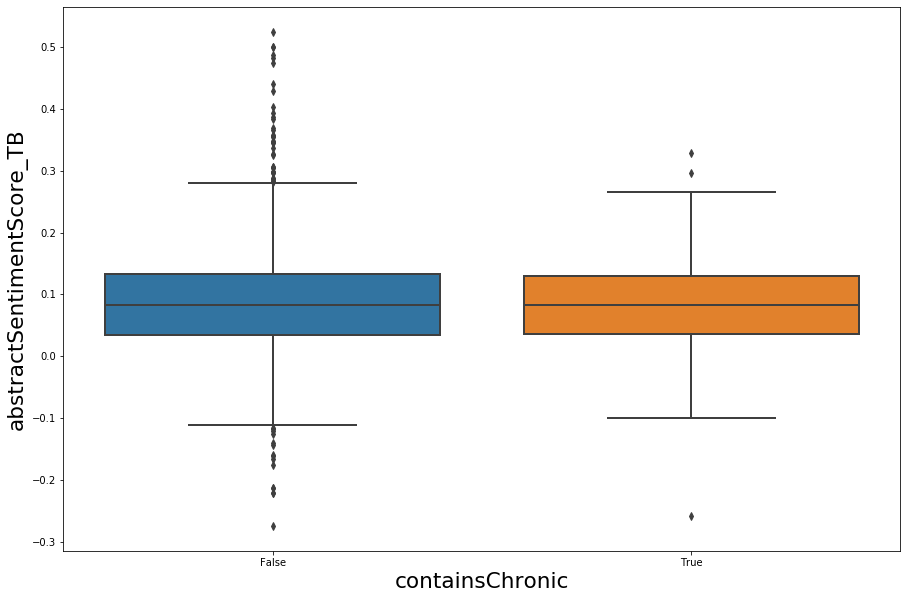

In [245]:
sns.boxplot(y='abstractSentimentScore_TB', x='containsChronic', data=LymeDisease)

In [260]:
text

'Lyme disease is the most common tick-borne disease in Europe and North America. In the hyperendemic Lyme disease regions of the eastern United States, nymphal Ixodes scapularis are the principal ticks transmitting the Lyme disease spirochete, Borrelia burgdorferi sensu stricto (s.s.). Approximately 25% of questing nymphs in endemic regions are infected with spirochetes. High throughput-sensitive and specific methods for testing nymphal I. scapularis for infection with B. burgdorferi are clearly needed. In the current study, we evaluated whether low-density microarrays could be adapted for the rapid and accurate detection and characterization of spirochetes in nymphal I. scapularis. Three different microarray platforms were developed and tested for the detection of spirochetes in ticks. They could both detect and differentiate different Borrelia genospecies, in one case detecting as few as a single copy of Borrelia DNA.'

## Sandbox

In [282]:
text_noStopwords = nltk.Text([word for word in tokenised_text if word.lower() not in stopwords])
# text_noStopwords.contents()

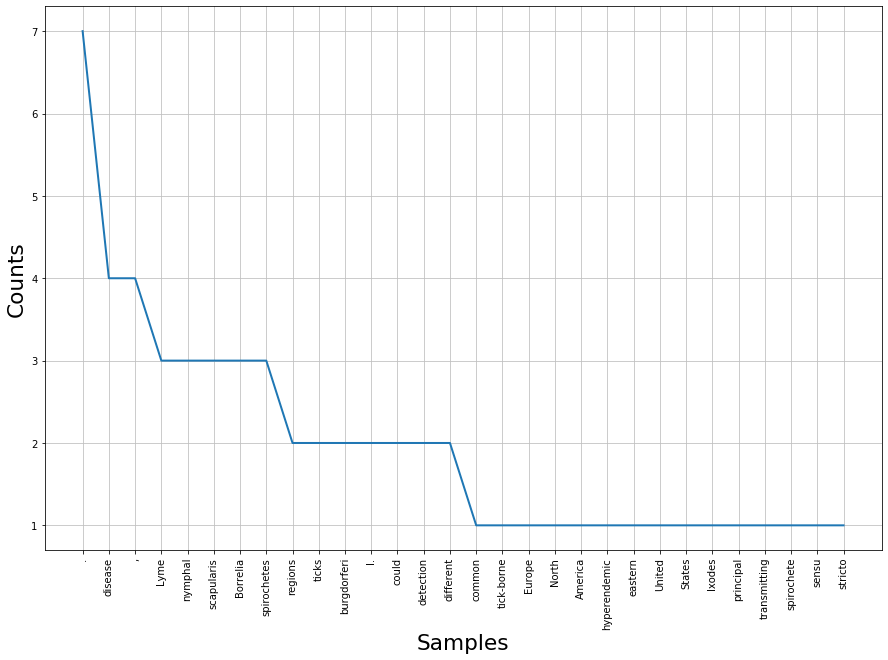

In [283]:
text_noStopwords.plot(30)

In [293]:
text_noStopwords.count('Lyme')

3

In [348]:
te.get_emotion(text)

{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.2, 'Fear': 0.8}

In [349]:
text

'Lyme disease is the most common tick-borne disease in Europe and North America. In the hyperendemic Lyme disease regions of the eastern United States, nymphal Ixodes scapularis are the principal ticks transmitting the Lyme disease spirochete, Borrelia burgdorferi sensu stricto (s.s.). Approximately 25% of questing nymphs in endemic regions are infected with spirochetes. High throughput-sensitive and specific methods for testing nymphal I. scapularis for infection with B. burgdorferi are clearly needed. In the current study, we evaluated whether low-density microarrays could be adapted for the rapid and accurate detection and characterization of spirochetes in nymphal I. scapularis. Three different microarray platforms were developed and tested for the detection of spirochetes in ticks. They could both detect and differentiate different Borrelia genospecies, in one case detecting as few as a single copy of Borrelia DNA.'

### Emotions

In [350]:
text_object = NRCLex(text)

In [351]:
emotions = text_object.affect_frequencies
emotions

{'fear': 0.1794871794871795,
 'anger': 0.10256410256410256,
 'anticip': 0.0,
 'trust': 0.05128205128205128,
 'surprise': 0.02564102564102564,
 'positive': 0.15384615384615385,
 'negative': 0.20512820512820512,
 'sadness': 0.15384615384615385,
 'disgust': 0.1282051282051282,
 'joy': 0.0}

In [352]:
emotions.pop('positive')
emotions.pop('negative')
emotions['anticipation']=emotions.pop('anticip')
emotions

{'fear': 0.1794871794871795,
 'anger': 0.10256410256410256,
 'trust': 0.05128205128205128,
 'surprise': 0.02564102564102564,
 'sadness': 0.15384615384615385,
 'disgust': 0.1282051282051282,
 'joy': 0.0,
 'anticipation': 0.0}

### Plutchik Wheel

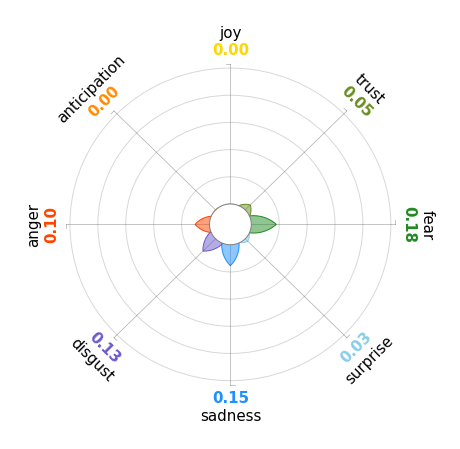

In [353]:
plutchik(emotions)